This is a notebook that looks at using `ggplot2` for (exploratory) data visualization.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></div><div class="lev1 toc-item"><a href="#Histograms" data-toc-modified-id="Histograms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Histograms</a></div><div class="lev1 toc-item"><a href="#Scatter-plots" data-toc-modified-id="Scatter-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scatter plots</a></div><div class="lev1 toc-item"><a href="#Line-plots" data-toc-modified-id="Line-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Line plots</a></div><div class="lev1 toc-item"><a href="#Scales" data-toc-modified-id="Scales-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scales</a></div><div class="lev1 toc-item"><a href="#Smoothing" data-toc-modified-id="Smoothing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Smoothing</a></div><div class="lev1 toc-item"><a href="#Limits" data-toc-modified-id="Limits-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Limits</a></div><div class="lev2 toc-item"><a href="#coord_cartesian" data-toc-modified-id="coord_cartesian-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><code>coord_cartesian</code></a></div><div class="lev2 toc-item"><a href="#xlim" data-toc-modified-id="xlim-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span><code>xlim</code></a></div><div class="lev2 toc-item"><a href="#filter" data-toc-modified-id="filter-73"><span class="toc-item-num">7.3&nbsp;&nbsp;</span><code>filter</code></a></div><div class="lev1 toc-item"><a href="#Skew" data-toc-modified-id="Skew-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Skew</a></div><div class="lev1 toc-item"><a href="#Density-plots" data-toc-modified-id="Density-plots-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Density plots</a></div><div class="lev1 toc-item"><a href="#aes" data-toc-modified-id="aes-10"><span class="toc-item-num">10&nbsp;&nbsp;</span><code>aes</code></a></div><div class="lev1 toc-item"><a href="#Cumulative-distributions" data-toc-modified-id="Cumulative-distributions-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Cumulative distributions</a></div><div class="lev1 toc-item"><a href="#Dot-plots" data-toc-modified-id="Dot-plots-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Dot plots</a></div><div class="lev1 toc-item"><a href="#Facets" data-toc-modified-id="Facets-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Facets</a></div><div class="lev1 toc-item"><a href="#Color" data-toc-modified-id="Color-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Color</a></div><div class="lev1 toc-item"><a href="#Saving-figures" data-toc-modified-id="Saving-figures-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Saving figures</a></div>

# Setup

First we'll load some packages: `tidyverse` for `dplyr` and `tidyr`, `lubridate` for manipulating dates, and `scales` for reformatting axis ticks.

We'll also set the theme for our plots (more themes [here](https://github.com/jrnold/ggthemes)) and set figure sizes for the notebook.

In [3]:
library(tidyverse)
library(lubridate)
library(scales)

theme_set(theme_bw())

options(repr.plot.width=4, repr.plot.height=3)

Next we'll read the [Movielens](https://grouplens.org/datasets/movielens/) data, obtained and converted to an R-friendly format with the `download_movielens.sh` script.

In [4]:
ratings <- read_csv('ratings.csv', col_names = c('user', 'movie','rating','ts'))
head(ratings)

user,movie,rating,ts
1,122,5,838985046
1,185,5,838983525
1,231,5,838983392
1,292,5,838983421
1,316,5,838983392
1,329,5,838983392


In [5]:
movies <- read_delim('movies.tsv', delim = "\t", col_names = c('movie','title', 'genres'), quote = "")
head(movies)

movie,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller


Convert the timestamp from [Unix time](https://en.wikipedia.org/wiki/Unix_time) to something human readable, and add the date without the time as well.

In [6]:
ratings <- ratings %>%
    mutate(ts = as.POSIXct(ts, origin='1970-01-01', tz='GMT'),
           ymd = as.Date(ts))
head(ratings)

user,movie,rating,ts,ymd
1,122,5,1996-08-02 11:24:06,1996-08-02
1,185,5,1996-08-02 10:58:45,1996-08-02
1,231,5,1996-08-02 10:56:32,1996-08-02
1,292,5,1996-08-02 10:57:01,1996-08-02
1,316,5,1996-08-02 10:56:32,1996-08-02
1,329,5,1996-08-02 10:56:32,1996-08-02


# Histograms

Plot the distribution of ratings by number of stars.

Note the warning that we should have specified the width or number of bins.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


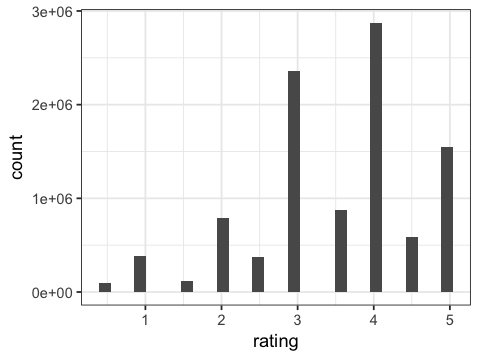

In [7]:
ggplot(ratings, aes(x = rating)) +
    geom_histogram()

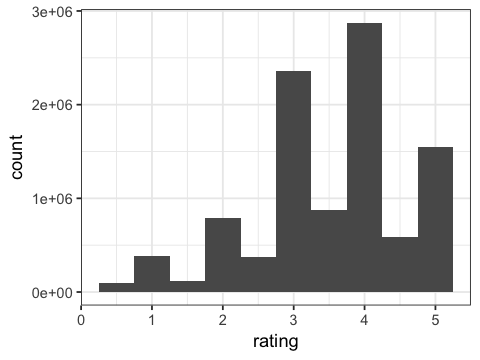

In [8]:
ggplot(ratings, aes(x = rating)) +
    geom_histogram(bins = 10)

# Scatter plots

Now compute the number of ratings per date and plot this over time.

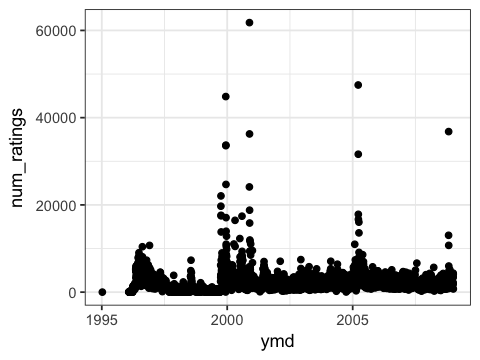

In [9]:
ratings_by_day <- ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n())

ggplot(ratings_by_day, aes(x = ymd, y = num_ratings)) +
        geom_point()

Note we can do this all in one shot, by summarizing the ratings data and piping the result into `ggplot`.
This is slick, although sometimes it can be useful to inspect the intermediate data frame.

Just be careful to switch from the pipe to a plus when you're using ggplot.

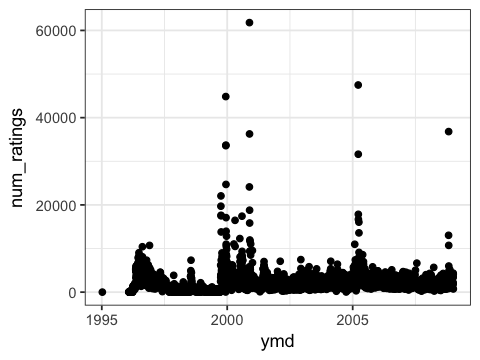

In [10]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_point()

# Line plots

There are too many points, and it's hard to connect them, so we'll switch to lines.

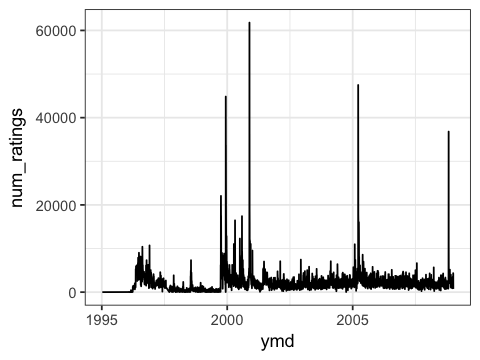

In [11]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line()

Let's clean up the axis labels, and add commas on the y-axis for readability.

This is a nice version of the plot if we want to emphasize that there are a few days with extremely high traffic.

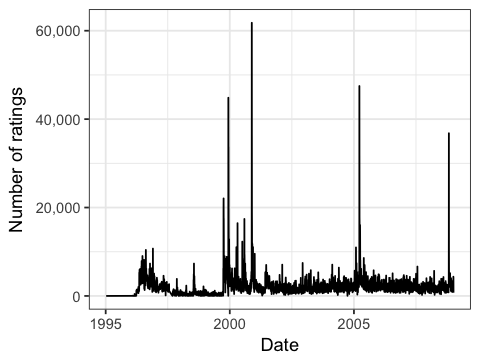

In [12]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line() +
        scale_y_continuous(label = comma) +
        xlab('Date') +
        ylab('Number of ratings')

# Scales

It's not as informative, however, if we want to know what happens on typical days.

For that we can transform the y-axis to be on a log scale.

This simple choice of scale changes the nature of the point we're emphasizing with the plot.

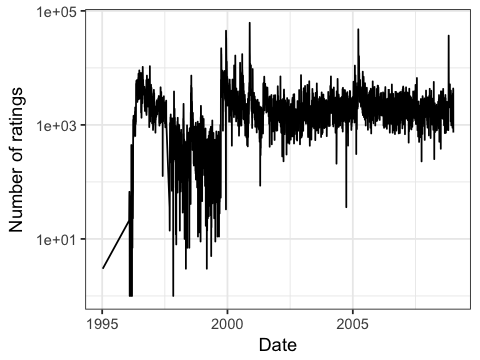

In [13]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line() +
        scale_y_log10() +
        xlab('Date') +
        ylab('Number of ratings')

Cleaning up the scientific notation on the y-axis helps.

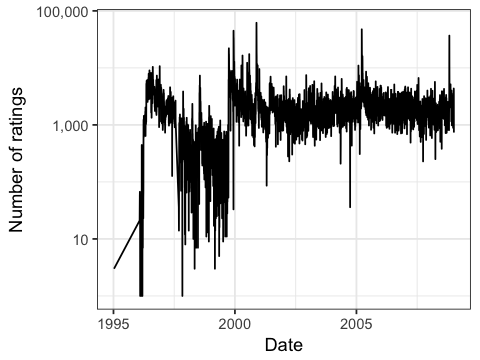

In [14]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line() +
        scale_y_log10(label = comma) +
        xlab('Date') +
        ylab('Number of ratings')

It's nice to add more breaks on the y-axis.
It's hard to interpolate on log scales, but showing 1, 3, 10 usually looks nice.

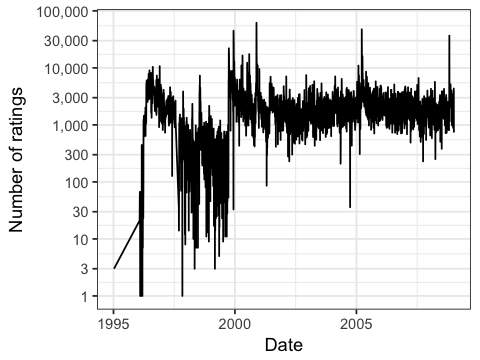

In [15]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = ymd, y = num_ratings)) +
        geom_line() +
        scale_y_log10(label = comma, breaks = c(1, 3, 10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5)) +
        xlab('Date') +
        ylab('Number of ratings')

We can easily pull out the days with extreme traffic by filtering if we want.

In [16]:
ratings %>%
    group_by(ymd) %>%
    summarize(num_ratings = n()) %>%

filter(num_ratings > 30e3)

ymd,num_ratings
1999-12-11,44838
1999-12-12,33579
1999-12-13,33701
2000-11-20,61793
2000-11-21,36271
2005-03-22,47488
2005-03-23,31618
2008-10-29,36808


# Smoothing 

This gives us a better sense of the typical day, but what about yearly trends in the data?

Let's first use `lubridate` to pull out the year of each rating and then summarize the yearly activity.

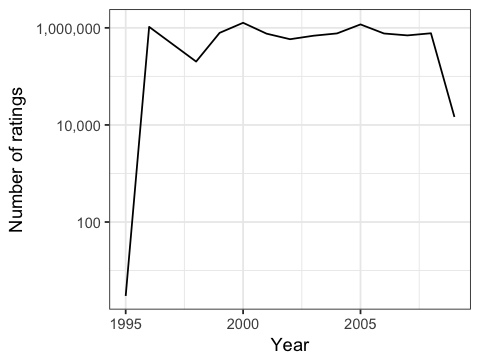

In [17]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_line() +
        scale_y_log10(label = comma) +
        xlab('Year') +
        ylab('Number of ratings')

# Limits

This is fine, but it would be nice to see an overall trend.

We can use `geom_smooth` for this, asking it to fit a linear model (`lm`) to the data and display it on top.

We'll switch to points for showing the raw data, and a line for the model. The ribbon shows a standard error on the model's estimated mean by year.

Note that `geom_smooth` respects the log transformation.

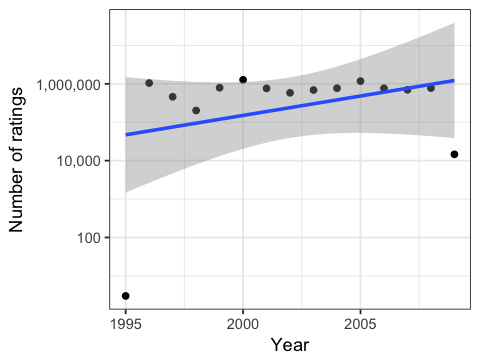

In [18]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        xlab('Year') +
        ylab('Number of ratings')

## `coord_cartesian`

That was quick and easy, but the fitted model is a bit strange---it's heavily influenced by two outlying points: 1995 and 2009, at the beginning and end of the dataset.
These have the effect of throwing off the regression line.

We can filter these points three different ways.

The first is to just exclude them from the visualization with `coord_cartesian(xlim = ...)`.

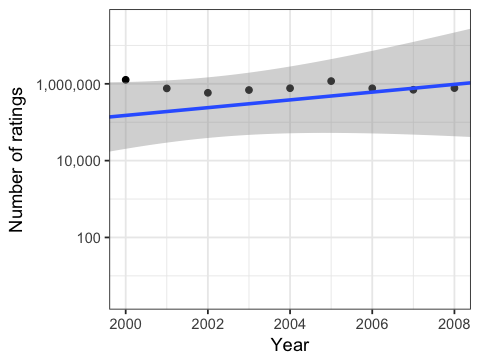

In [19]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        coord_cartesian(xlim = c(2000, 2008)) +
        xlab('Year') +
        ylab('Number of ratings')

## `xlim`
This zooms the plot, but the fitted model stays the same.

That's not really what we want here.

Instead, we can use `xlim` or `scale_x_continuous(lim = ...)` to *filter the data first* and then fit and display the model.
Notice the `ggplot` warns you about these discarded points, which is easy to ignore!

As a result, the fitted model actually changes: instead of the upward slope above, we now have a downward slope.

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

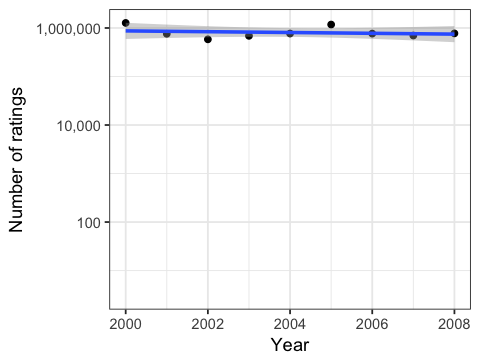

In [20]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        xlim(c(2000, 2008)) +
        xlab('Year') +
        ylab('Number of ratings')

## `filter`

Finally, one option is just to filter the data yourself beforehand.
This is less slick, but more explicit, and might prevent errors going forward.

A good rule of thumb is to use `filter` to explicitly remove points and otherwise use `coord_cartesian` to change what's displayed.

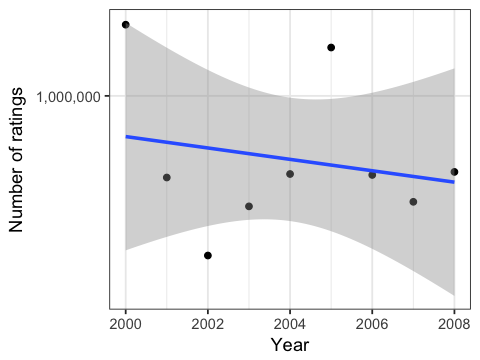

In [21]:
ratings %>%
    group_by(year = year(ts)) %>%
    filter(year >= 2000, year <= 2008) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        xlab('Year') +
        ylab('Number of ratings')

After fixing up the limits, we have a plot that shows there's a slight decrease in the order of magnitude of ratings over years.

It's easy to loose sight of the fact that this is a log scale, and that this translates to a reasonable overall drop of hundreds of thousands of ratings.

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

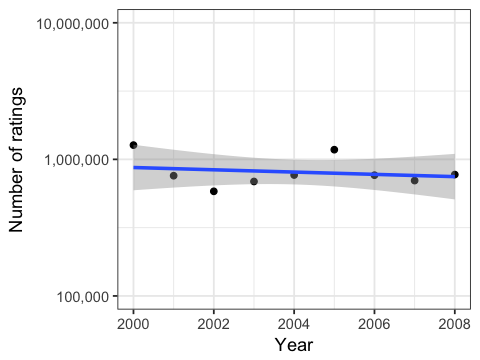

In [22]:
ratings %>%
    group_by(year = year(ts)) %>%
    summarize(num_ratings = n()) %>%
    ggplot(aes(x = year, y = num_ratings)) +
        geom_point() +
        geom_smooth(method = "lm") +
        scale_y_log10(label = comma) +
        xlim(c(2000, 2008)) +
        coord_cartesian(ylim = c(1e5, 1e7)) +
        xlab('Year') +
        ylab('Number of ratings')

# Skew

Now let's look at the overall distribution of attention across movies.

For this we'll compute the number of ratings by movie.

In [23]:
ratings_by_movie <- ratings %>%
    group_by(movie) %>%
    summarize(num_ratings = n(),
              mean_rating = mean(rating),
              se_rating = sd(rating) / sqrt(n())) %>%
    arrange(desc(num_ratings)) %>%
    ungroup()
head(ratings_by_movie)

movie,num_ratings,mean_rating,se_rating
296,34864,4.157426,0.005369043
356,34457,4.013582,0.005217213
593,33668,4.204200,0.004568511
480,32631,3.661564,0.005195836
318,31126,4.457238,0.004059660
110,29154,4.082390,0.005578202


We'll can add the movie titles by joining to the `movies` table on movie id.

In [24]:
ratings_by_movie <- ratings_by_movie %>%
    left_join(movies) %>%
    select(-genres)
head(ratings_by_movie)

Joining, by = "movie"


movie,num_ratings,mean_rating,se_rating,title
296,34864,4.157426,0.005369043,Pulp Fiction (1994)
356,34457,4.013582,0.005217213,Forrest Gump (1994)
593,33668,4.204200,0.004568511,"Silence of the Lambs, The (1991)"
480,32631,3.661564,0.005195836,Jurassic Park (1993)
318,31126,4.457238,0.004059660,"Shawshank Redemption, The (1994)"
110,29154,4.082390,0.005578202,Braveheart (1995)


Plotting a histogram of number of ratings by movie, we see a "long tailed" distribution, where most movies get little attention and a few get a lot of attention.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


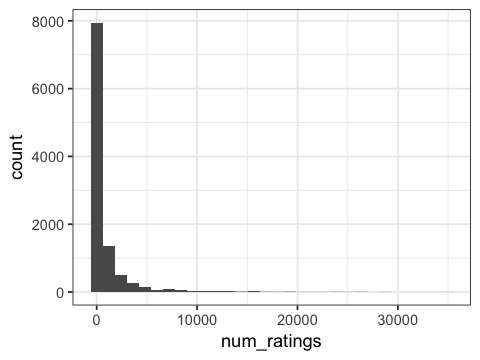

In [25]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_histogram()

Again, controlling the binning is important.

So if we want to empahsize the heavy skew in attention, we might go with a plot like this.

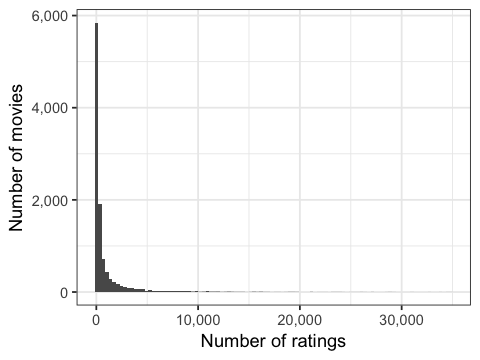

In [26]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_histogram(bins = 100) +
    scale_x_continuous(label = comma) +
    scale_y_continuous(label = comma) +
    xlab('Number of ratings') +
    ylab('Number of movies')

The downside of the above plot is that we can't really see into the tail.

A log scale will show this more clearly, but will suppress the skew in the data.

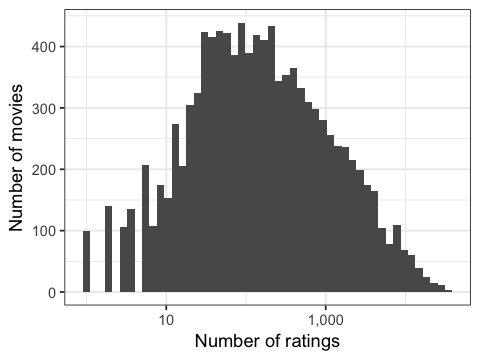

In [27]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_histogram(bins = 50) +
    scale_x_log10(label = comma) +
    xlab('Number of ratings') +
    ylab('Number of movies')

# Density plots

The density geom will give a smoothed version of this histogram.

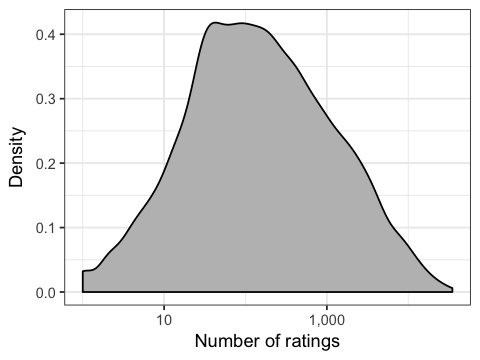

In [28]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    scale_x_log10(label = comma) +
    xlab('Number of ratings') +
    ylab('Density')

We can overlay summary statistics, such as the mean.

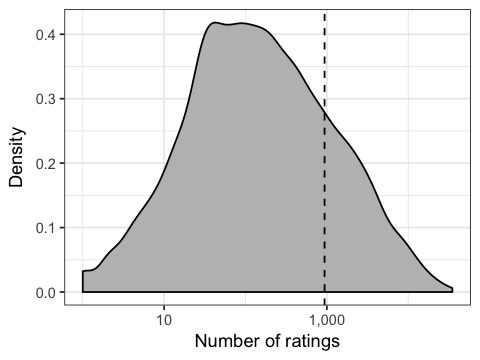

In [29]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    geom_vline(aes(xintercept = mean(num_ratings)), linetype = "dashed") +
    scale_x_log10(label = comma) +
    xlab('Number of ratings') +
    ylab('Density')

But the mean is skewed by the long tail, so the median is probably what we're more interested in.

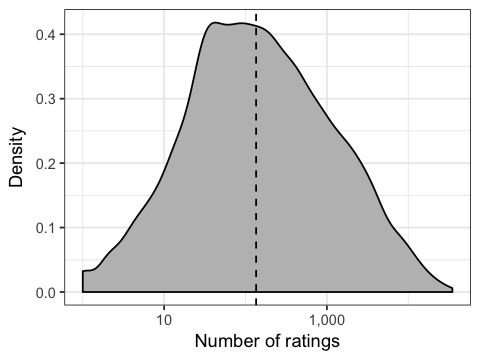

In [30]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    geom_vline(aes(xintercept = median(num_ratings)), linetype = "dashed") +
    scale_x_log10(label = comma) +
    xlab('Number of ratings') +
    ylab('Density')

# `aes`

In the above, we used computed the median on the `num_ratings` column inside the `aes` function.

Alternatively, we could have computed and stored this information in a separate variable and passed this directly to `geom_vline` without the aesthetic mapping.

[1] 135

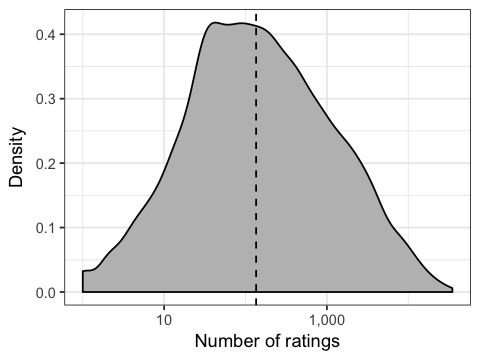

In [31]:
median_num_ratings <- median(ratings_by_movie$num_ratings)
median_num_ratings
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    geom_vline(xintercept = median_num_ratings, linetype = "dashed") +
    scale_x_log10(label = comma) +
    xlab('Number of ratings') +
    ylab('Density')

So it's important to be clear about what does and doesn't get mapped through `aes`.

For instance, moving the linetype into the aesthetic mapping will map the string `"dashed"` to a linetype, in this case solid.
And it will show a legend.

This is probably not what we want.

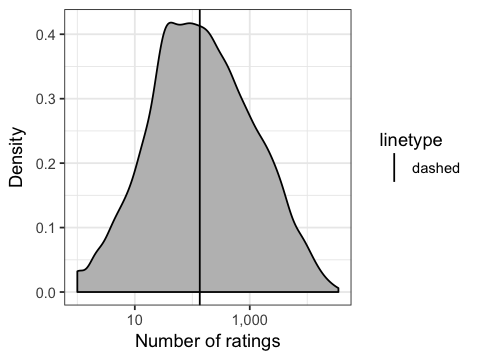

In [32]:
ggplot(ratings_by_movie, aes(x = num_ratings)) +
    geom_density(fill = "grey") +
    scale_x_log10(label = comma) +
    geom_vline(aes(xintercept = median(num_ratings), linetype = "dashed")) +
    xlab('Number of ratings') +
    ylab('Density')

# Cumulative distributions

Another approach is to look at the cumulative distribution, which show what fraction of observations are covered by the top k items.

There are functions like `stat_ecdf()` to compute this, but it's instructive to do this manually.
First we rank items by the number of ratings.
The top 6 movies are shown below.

In [33]:
ratings_by_movie <- ratings_by_movie %>%
    ungroup() %>%
    mutate(rank = rank(desc(num_ratings)))
head(ratings_by_movie)

movie,num_ratings,mean_rating,se_rating,title,rank
296,34864,4.157426,0.005369043,Pulp Fiction (1994),1
356,34457,4.013582,0.005217213,Forrest Gump (1994),2
593,33668,4.204200,0.004568511,"Silence of the Lambs, The (1991)",3
480,32631,3.661564,0.005195836,Jurassic Park (1993),4
318,31126,4.457238,0.004059660,"Shawshank Redemption, The (1994)",5
110,29154,4.082390,0.005578202,Braveheart (1995),6


Then we compute a running sum of the number of ratings that the top k items comprise.

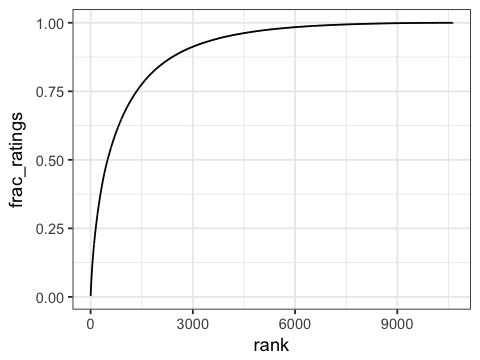

In [34]:
ratings_by_movie %>%
    mutate(frac_ratings = cumsum(num_ratings) / sum(num_ratings)) %>%
    ggplot(aes(x = rank, y = frac_ratings)) +
    geom_line()

And we clean up the labels and axes.

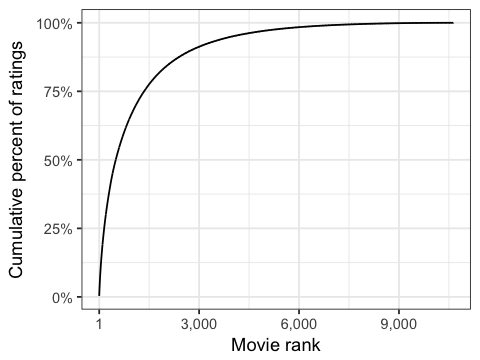

In [35]:
ratings_by_movie %>%
    mutate(frac_ratings = cumsum(num_ratings) / sum(num_ratings)) %>%
    ggplot(aes(x = rank, y = frac_ratings)) +
    geom_line() +
    scale_x_continuous(label = comma, breaks = c(1, 3e3, 6e3, 9e3)) +
    scale_y_continuous(label = percent) +
    xlab('Movie rank') +
    ylab('Cumulative percent of ratings')

# Dot plots

We can also look at specific movies.

For instance, let's plot the average rating of the top 10 movies.

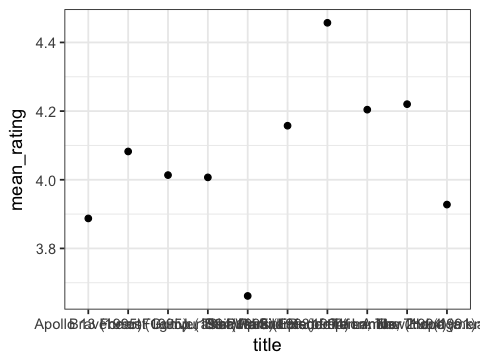

In [36]:
ratings_by_movie %>%
    slice(1:10) %>%
    ggplot(aes(x = title, y = mean_rating)) +
    geom_point()

`ggplot` knows to treat the title strings as categories, but the titles overlap and are hard to read.

It's a good idea to flip the axes when you have long labels like this.

In [37]:
options(repr.plot.width=6, repr.plot.height=3)

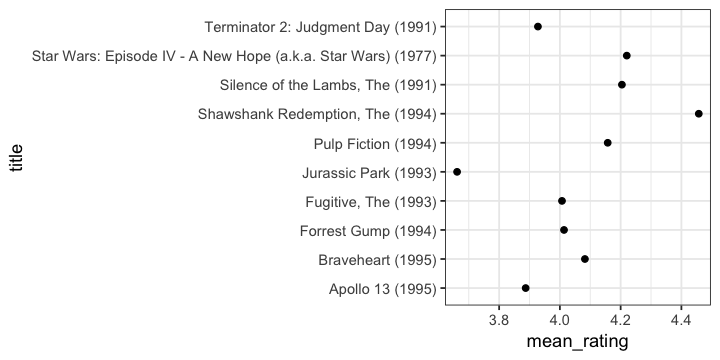

In [38]:
ratings_by_movie %>%
    slice(1:10) %>%
    ggplot(aes(x = title, y = mean_rating)) +
    geom_point() +
    coord_flip()

This is more readable, but it revels that the titles were sorted alphabetically, which here is meaningless.

We can use `reorder` to control this sorting, as `ggplot` respects the order of a factor.
For instance, we can show the top 10 movies in order from highest to lowest rating.

This makes it easy to see that "The Shawshank Redemption" is the highest rated while "Jurrasic Park" is the lowest.

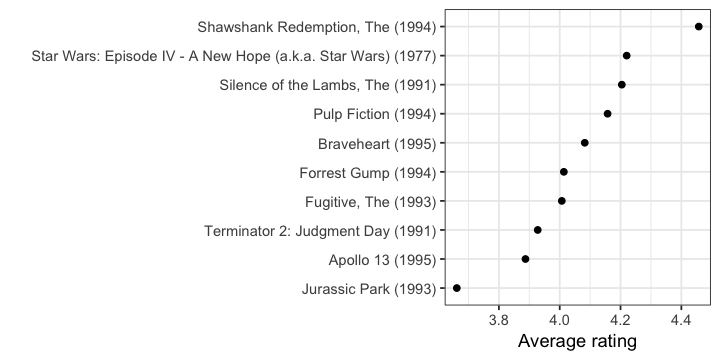

In [39]:
ratings_by_movie %>%
    mutate(title = reorder(title, mean_rating)) %>%
    slice(1:10) %>%
    ggplot(aes(x = mean_rating, y = title)) +
    geom_point() +
    xlab('Average rating') +
    ylab('')

Alternatively, we might want to keep the movies ranked by the number of ratings.

Doing so reveals that there's relatively little correlation, among this set, between number of ratings and average rating.

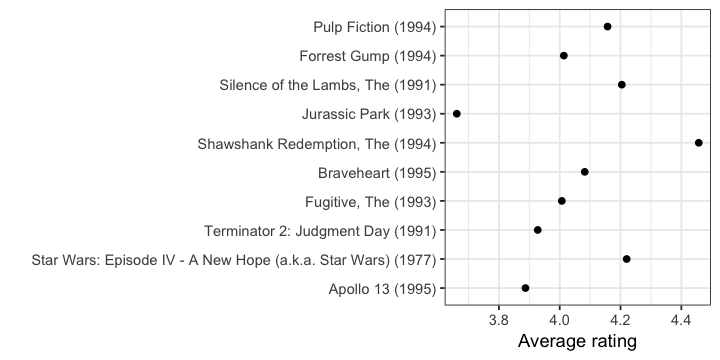

In [ ]:
ratings_by_movie %>%
    mutate(title = reorder(title, num_ratings)) %>%
    slice(1:10) %>%
    ggplot(aes(x = mean_rating, y = title)) +
    geom_point() +
    xlab('Average rating') +
    ylab('')

Now let's take a look at some movies in the tail with some of the fewest ratings in the dataset.

In [41]:
ratings_by_movie %>%
    mutate(title = reorder(title, mean_rating)) %>%
    slice(10050:10060)

movie,num_ratings,mean_rating,se_rating,title,rank
33113,6,3.833333,0.2788867,Act of Violence (1948),10035.5
33340,6,3.750000,0.1118034,Kids Return (Kizzu ritân) (1996),10035.5
33629,6,3.166667,0.2788867,Airborne (1993),10035.5
33641,6,3.333333,0.3073181,Tell Them Who You Are (2004),10035.5
34189,6,1.833333,0.3574602,Twin Sitters (1994),10035.5
34526,6,2.666667,0.3574602,Secuestro Express (2004),10035.5
36541,6,2.166667,0.5868939,HellBent (2004),10035.5
37287,6,3.083333,0.4901814,Gertrud (1964),10035.5
37335,6,3.666667,0.2108185,Come Drink with Me (Da zui xia) (1966),10035.5
40752,6,2.583333,0.5230785,Takeshis' (2005),10035.5


Looking at the average ratings and the standard errors on them, we see there's a lot more uncertainty in the estimated quality of each movie, because we have only six ratings for each.

When this is the case it's important to display error bars to convey this information to the reader.
This underscores the point that while we can be fairly certain that people like "Act of Violence" more than "Twin Sitters", we can't really say much about any differences between "Airborne" and "Gertrud" without collecting more data.

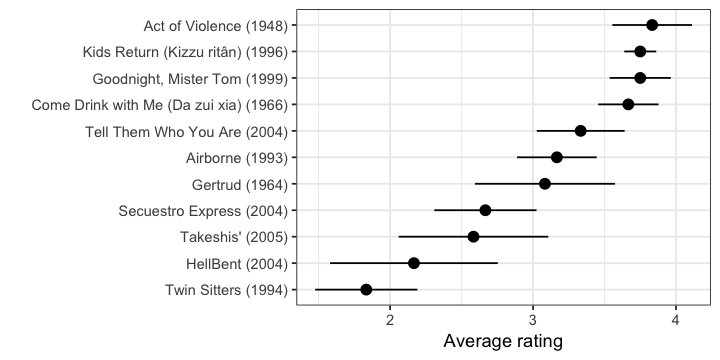

In [42]:
ratings_by_movie %>%
    mutate(title = reorder(title, mean_rating)) %>%
    slice(10050:10060) %>%
    ggplot(aes(x = title, y = mean_rating)) +
    geom_pointrange(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating)) +
    xlab('') +
    ylab('Average rating') +
    coord_flip()

# Facets

Sometimes we want to look at the same type of plot for many different things.

For instance, the instead of just looking at the mean for each movie, we might want to see the full distribution of ratings for each movie.

First we'll do an inner join to select the ratings for just the top 10 movies.

In [43]:
top_ratings <- ratings_by_movie %>%
    select(movie, title, rank) %>%
    slice(1:10) %>%
    inner_join(ratings)
head(top_ratings)
tail(top_ratings)

Joining, by = "movie"


movie,title,rank,user,rating,ts,ymd
296,Pulp Fiction (1994),1,10,2,1999-11-02 08:04:24,1999-11-02
296,Pulp Fiction (1994),1,11,3,1999-12-24 05:08:25,1999-12-24
296,Pulp Fiction (1994),1,13,4,2002-10-21 16:40:06,2002-10-21
296,Pulp Fiction (1994),1,18,5,2005-03-23 02:44:55,2005-03-23
296,Pulp Fiction (1994),1,22,5,1996-08-02 10:54:37,1996-08-02
296,Pulp Fiction (1994),1,23,4,1996-12-02 16:28:03,1996-12-02


movie,title,rank,user,rating,ts,ymd
150,Apollo 13 (1995),10,71554,5,1996-10-04 08:04:01,1996-10-04
150,Apollo 13 (1995),10,71557,3,2005-12-03 00:04:56,2005-12-03
150,Apollo 13 (1995),10,71558,4,2000-06-01 20:02:46,2000-06-01
150,Apollo 13 (1995),10,71560,4,1996-08-02 10:49:51,1996-08-02
150,Apollo 13 (1995),10,71562,4,2008-07-20 16:34:23,2008-07-20
150,Apollo 13 (1995),10,71566,5,1996-04-24 10:13:21,1996-04-24


We could look at the distribution for any particular movie by filtering, but this is time consuming.

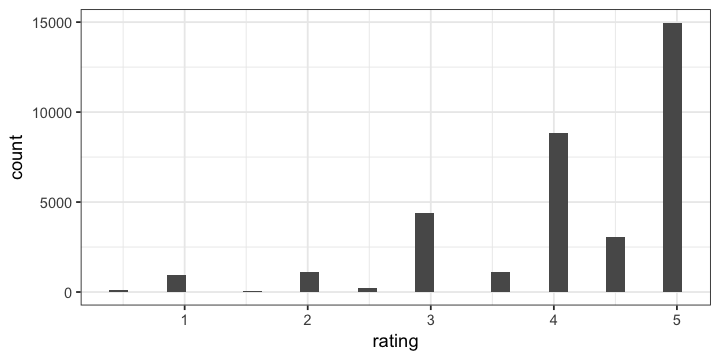

In [44]:
top_ratings %>%
    filter(title == "Pulp Fiction (1994)") %>%
    ggplot(aes(x = rating)) +
    geom_histogram(bins = 30)

Facets are a way to easily split the same type of plot into many different panels.

They use R's formula syntax.
The most common version of this for `facet_wrap` is simply stating a varible to split panels by.

This let's us easily see the distribution of ratings for all 10 movies at once.

In [45]:
options(repr.plot.width=9, repr.plot.height=5)

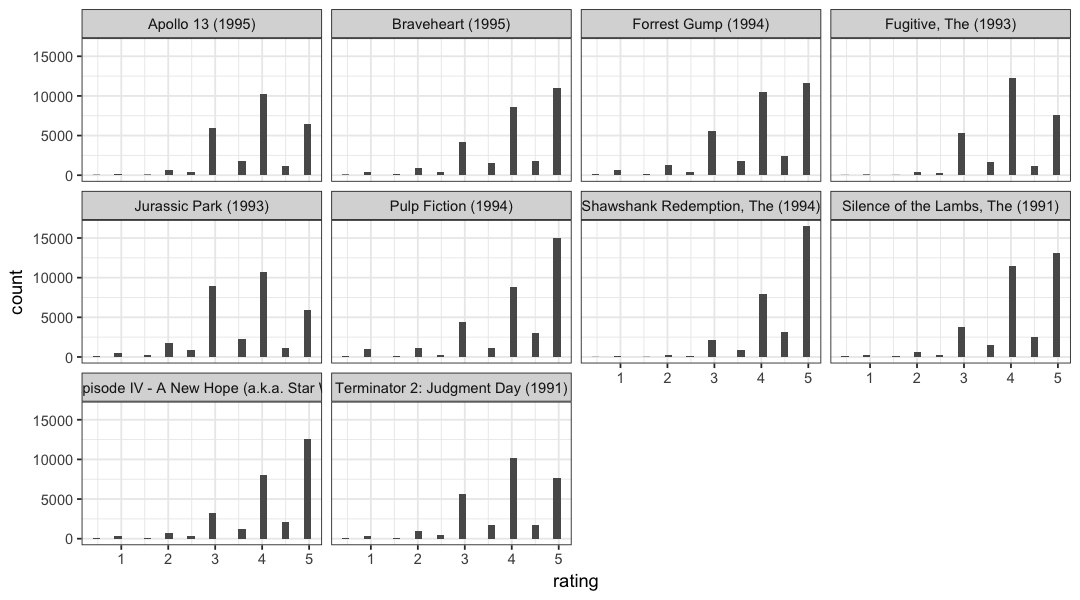

In [46]:
top_ratings %>%
    ggplot(aes(x = rating)) +
    geom_histogram(bins = 30) +
    facet_wrap(~ title)

# Color

Now let's look at the average rating by movie and year.

In [47]:
top_ratings_by_year <- top_ratings %>%
    group_by(rank, movie, title, year = year(ymd)) %>%
    summarize(num_ratings = n(),
              mean_rating = mean(rating),
              se_rating = sd(rating) / sqrt(n()))
head(top_ratings_by_year)

rank,movie,title,year,num_ratings,mean_rating,se_rating
1,296,Pulp Fiction (1994),1996,12076,4.018632,0.01008435
1,296,Pulp Fiction (1994),1997,1356,4.233776,0.02689339
1,296,Pulp Fiction (1994),1998,717,4.099024,0.04360156
1,296,Pulp Fiction (1994),1999,2678,4.236370,0.01943323
1,296,Pulp Fiction (1994),2000,2849,4.247104,0.01912575
1,296,Pulp Fiction (1994),2001,1608,4.235697,0.02613990


We can assign each movie to a different color through the `aes` mapping.

This shows that each movie follows the same, relatively uninteresting, pattern, more or less.

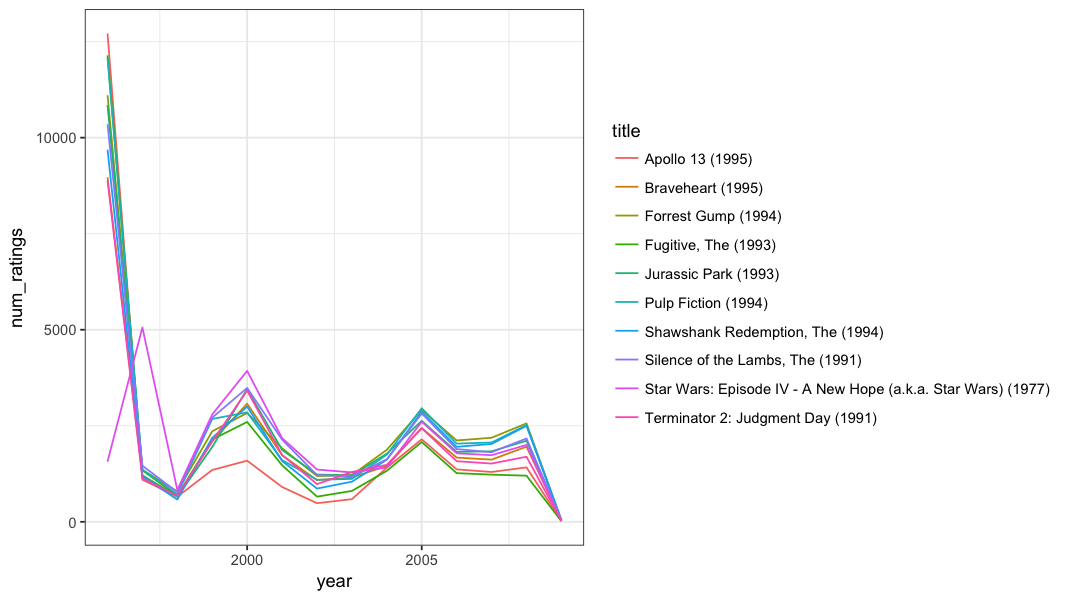

In [48]:
ggplot(top_ratings_by_year, aes(x = year, y = num_ratings, color = title)) +
    geom_line()

Let's look at average rating by film over time instead.

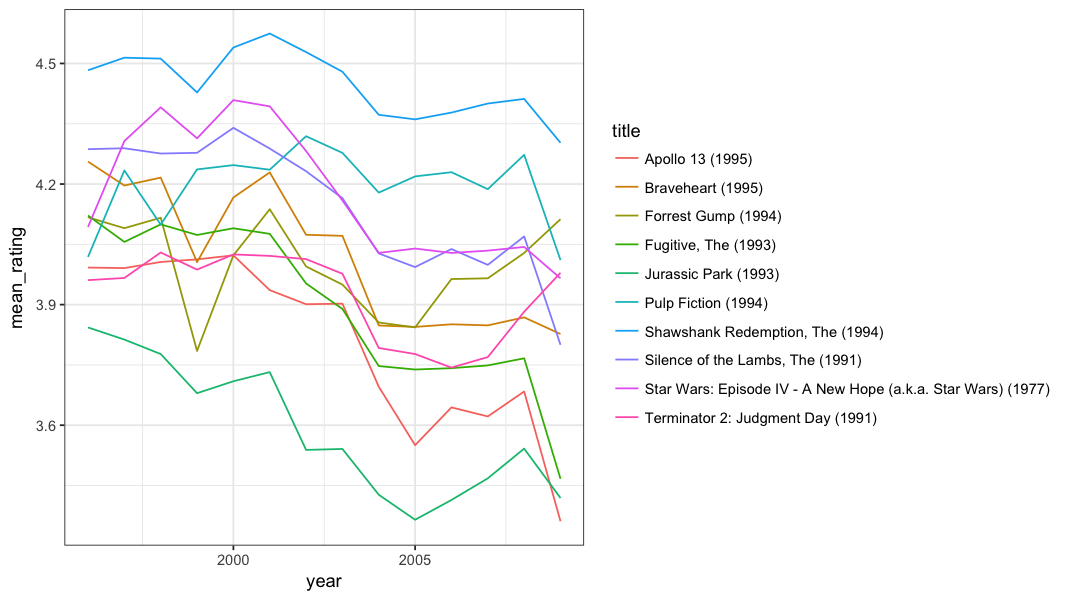

In [49]:
ggplot(top_ratings_by_year, aes(x = year, y = mean_rating, color = title)) +
    geom_line()

There's something more interesting going on here, but before we move on we should display the uncertainty in these numbers.

`geom_ribbon` is a nice way to do this when both axes are continuous.

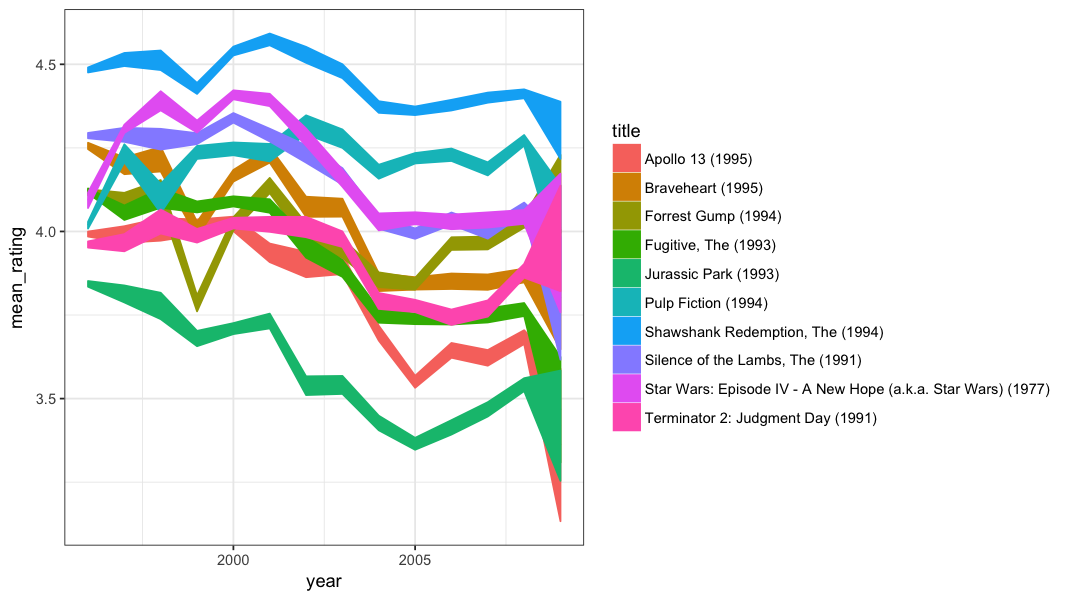

In [50]:
ggplot(top_ratings_by_year, aes(x = year, y = mean_rating, color = title, fill = title)) +
    geom_line() +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating))

The solide lines make it difficult to distinguish the means from the standard errors.

We can use the `alpha` argument for some transparency on the ribbon.

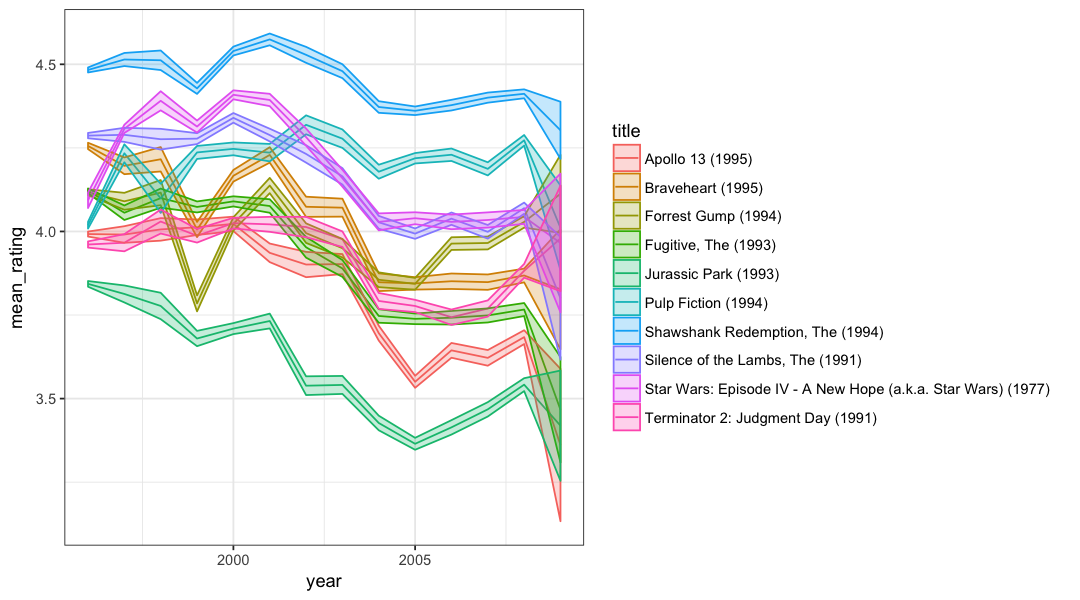

In [51]:
ggplot(top_ratings_by_year, aes(x = year, y = mean_rating, color = title, fill = title)) +
    geom_line() +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating), alpha = 0.25)

The lines on the ribbon borders aren't really necessary.

We can get rid of them by moving the `color` mapping into the `geom_line`, instead of having in the main `ggplot` call and it being broadcast to all geoms.

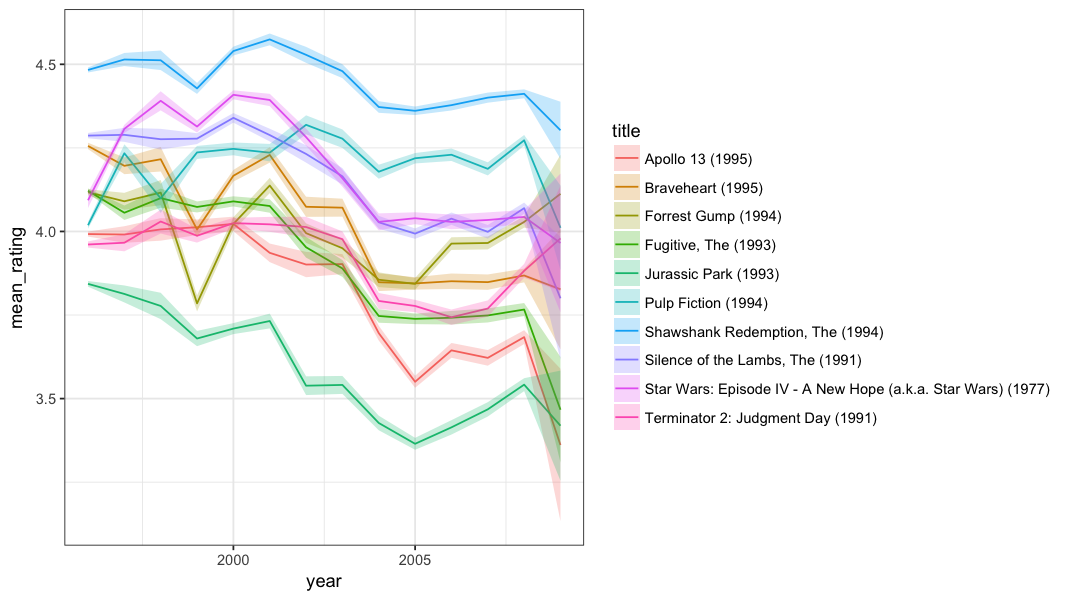

In [52]:
ggplot(top_ratings_by_year, aes(x = year, y = mean_rating)) +
    geom_line(aes(color = title)) +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating, fill = title), alpha = 0.25)

This is better, but it's still tough to match the lines on the plot to the colors in the legend.

This is because movies have been colored in alphabetical order, as with the dot plot above.

We can use the `reorder` function to change this, but have to be mindful of any groupings.

In [53]:
# this will fail because we didn't ungroup above!
#top_ratings_by_year %>%
#    mutate(title = reorder(title, mean_rating, last)) %>%
#    ggplot(aes(x = year, y = mean_rating)) +
#    geom_line(aes(color = title)) +
#    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating, fill = title), alpha = 0.25)

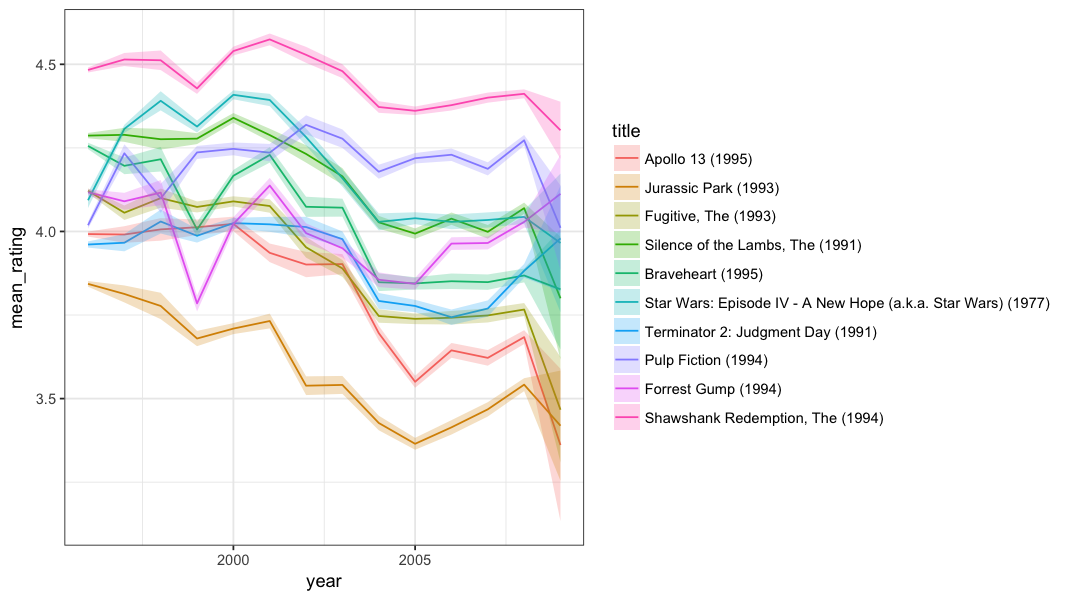

In [54]:
top_ratings_by_year %>%
    ungroup() %>%
    mutate(title = reorder(title, mean_rating, last)) %>%
    ggplot(aes(x = year, y = mean_rating)) +
    geom_line(aes(color = title)) +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating, fill = title), alpha = 0.25)

We're almost there, but the legend is upside down. The `desc` function to the rescue.

Now it's much easier to map each line to its title.

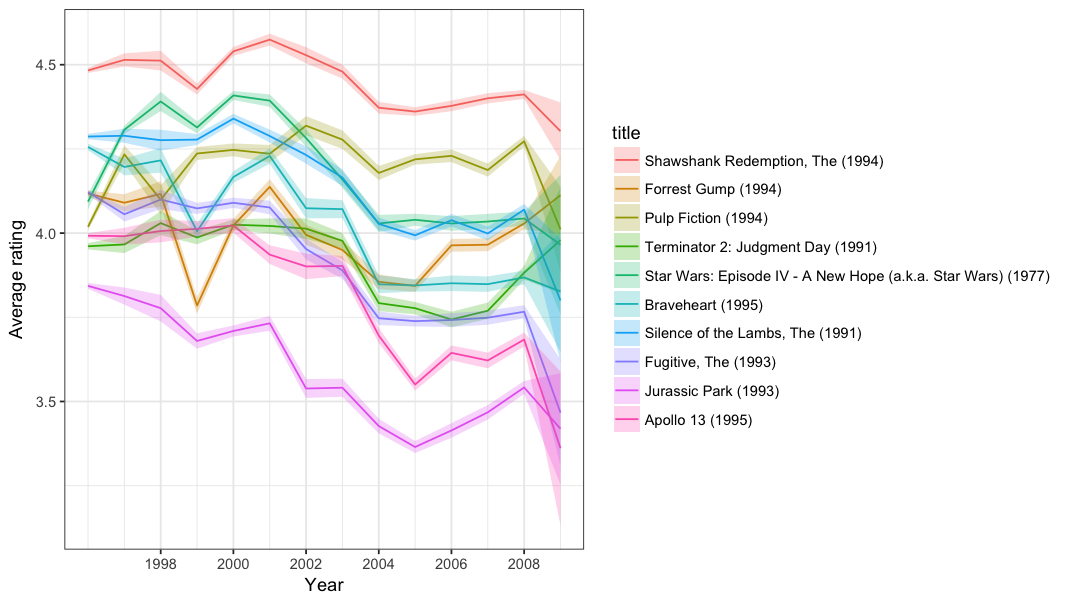

In [55]:
top_ratings_by_year %>%
    ungroup() %>%
    mutate(title = reorder(title, desc(mean_rating), last)) %>%
    ggplot(aes(x = year, y = mean_rating)) +
    geom_line(aes(color = title)) +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating, fill = title), alpha = 0.25) +
    scale_x_continuous(breaks = seq(1998, 2008, by = 2)) +
    xlab('Year') +
    ylab('Average rating')

We can easily change the color scheme, for instance using a diverging [color brewer](http://colorbrewer2.org/) palette to show higher rated movies in red and lower rated films in blue.

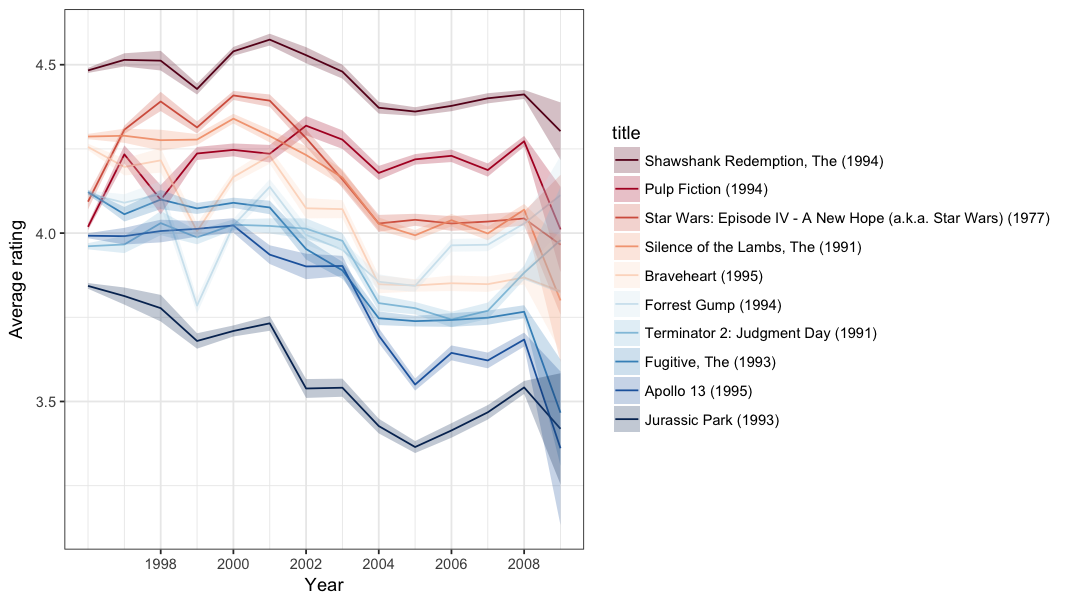

In [56]:
top_ratings_by_year %>%
    ungroup() %>%
    mutate(title = reorder(title, -mean_rating, mean)) %>%
    ggplot(aes(x = year, y = mean_rating)) +
    geom_line(aes(color = title)) +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating, fill = title), alpha = 0.25) +
    scale_x_continuous(breaks = seq(1998, 2008, by = 2)) +
    xlab('Year') +
    ylab('Average rating') +
    scale_color_brewer(type = "div", palette = "RdBu") +
    scale_fill_brewer(type = "div", palette = "RdBu")

We might take a different approach if we want to emphasize the changes within each movie instead of comparing movies to each other.

Calling `facet_wrap` with free scales will normalize every panel to shift the range of the scales accordingly.
This can be done for just the x-axis (`free_x`), the y-axis (`free_y`), or both (`free`).

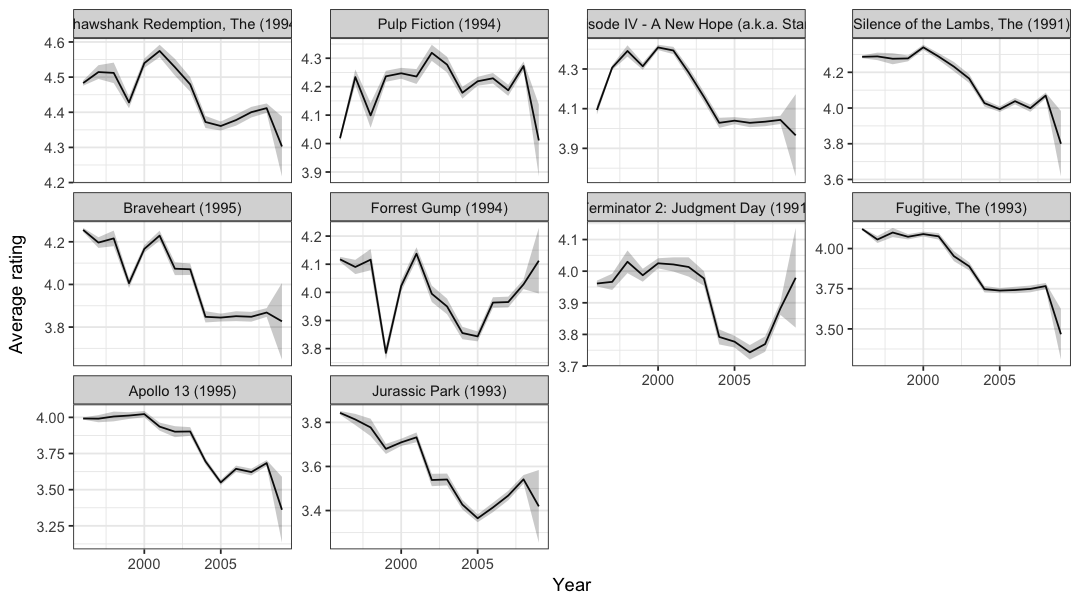

In [57]:
top_ratings_by_year %>%
    ungroup() %>%
    mutate(title = reorder(title, -mean_rating, mean)) %>%
    ggplot(aes(x = year, y = mean_rating)) +
    geom_line() +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating), alpha = 0.25) +
    scale_x_continuous() +
    scale_color_brewer(type = "div", palette = "Paired") +
    scale_fill_brewer(type = "div", palette = "Paired") +
    xlab('Year') +
    ylab('Average rating') +
    facet_wrap(~ title, scale = "free_y")

Let's do this for the "Harry Potter" movie series.

First we'll identify those movies and select their ratings with a join, similar to above.

In [58]:
harry_potter <- ratings_by_movie %>%
    filter(grepl('Harry Potter', title))
harry_potter

movie,num_ratings,mean_rating,se_rating,title,rank
4896,7834,3.595417,0.01085528,Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),270
5816,6488,3.563194,0.01152116,Harry Potter and the Chamber of Secrets (2002),364
8368,5304,3.733032,0.01204166,Harry Potter and the Prisoner of Azkaban (2004),432
40815,3452,3.693366,0.01516913,Harry Potter and the Goblet of Fire (2005),737
54001,1516,3.651055,0.02324416,Harry Potter and the Order of the Phoenix (2007),1554


In [59]:
harry_potter_ratings_by_year <- harry_potter %>%
    select(movie, title, rank) %>%
    inner_join(ratings) %>%
    group_by(rank, movie, title, year = year(ymd)) %>%
    summarize(num_ratings = n(),
              mean_rating = mean(rating),
              se_rating = sd(rating) / sqrt(n()),
              first_rating = min(ymd))
head(harry_potter_ratings_by_year)
tail(harry_potter_ratings_by_year)

Joining, by = "movie"


rank,movie,title,year,num_ratings,mean_rating,se_rating,first_rating
270,4896,Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),2001,439,3.845103,0.04263181,2001-11-11
270,4896,Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),2002,1231,3.763607,0.02770516,2002-01-01
270,4896,Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),2003,1043,3.660115,0.02937447,2003-01-01
270,4896,Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),2004,909,3.633113,0.03043222,2004-01-01
270,4896,Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),2005,1441,3.541638,0.02389716,2005-01-01
270,4896,Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),2006,944,3.528602,0.03229999,2006-01-01


rank,movie,title,year,num_ratings,mean_rating,se_rating,first_rating
737,40815,Harry Potter and the Goblet of Fire (2005),2007,893,3.627660,0.02973829,2007-01-01
737,40815,Harry Potter and the Goblet of Fire (2005),2008,813,3.580566,0.03238755,2008-01-01
737,40815,Harry Potter and the Goblet of Fire (2005),2009,10,3.650000,0.25873624,2009-01-01
1554,54001,Harry Potter and the Order of the Phoenix (2007),2007,710,3.719014,0.03123733,2007-06-29
1554,54001,Harry Potter and the Order of the Phoenix (2007),2008,796,3.583543,0.03409641,2008-01-01
1554,54001,Harry Potter and the Order of the Phoenix (2007),2009,10,4.200000,0.21343747,2009-01-01


First, all movies on one plot.

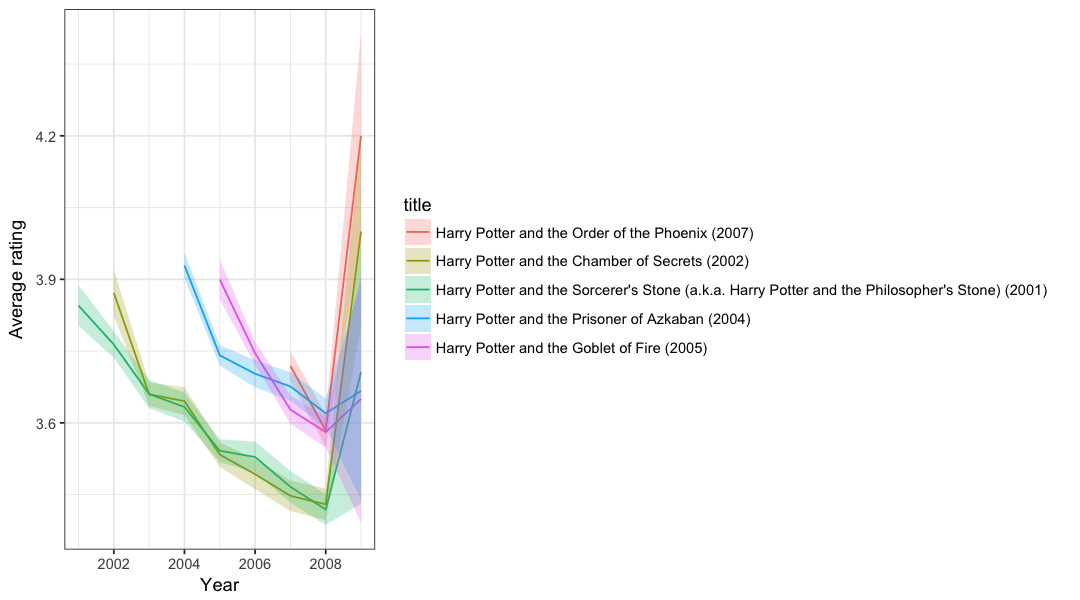

In [60]:
harry_potter_ratings_by_year %>%
    ungroup() %>%
    mutate(title = reorder(title, -mean_rating, last)) %>%
    ggplot(aes(x = year, y = mean_rating)) +
    geom_line(aes(color = title)) +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating, fill = title), alpha = 0.25) +
    scale_x_continuous(breaks = seq(1998, 2008, by = 2)) +
    xlab('Year') +
    ylab('Average rating')

Next, individual facets.

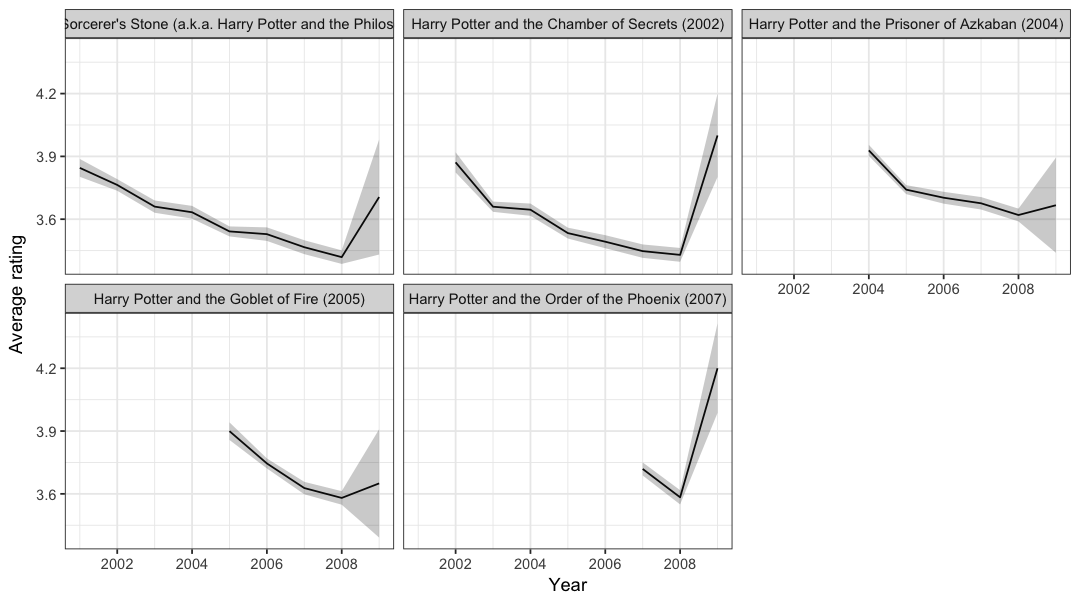

In [61]:
harry_potter_ratings_by_year %>%
    ungroup() %>%
    mutate(title = reorder(title, first_rating, min)) %>%
    ggplot(aes(x = year, y = mean_rating)) +
    geom_line() +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating), alpha = 0.25) +
    facet_wrap(~ title) +
    scale_x_continuous(breaks = seq(1998, 2008, by = 2)) +
    xlab('Year') +
    ylab('Average rating')

Finally can use some of the `tidyr` tools to clean up the movie titles, pulling out the subtitles.

In [62]:
plot_data <- harry_potter_ratings_by_year %>%
    ungroup() %>%
    extract(title, "subtitle", "Harry Potter and the (.*?) \\(.*$") %>%
    mutate(subtitle = reorder(subtitle, first_rating, min))
head(plot_data)

rank,movie,subtitle,year,num_ratings,mean_rating,se_rating,first_rating
270,4896,Sorcerer's Stone,2001,439,3.845103,0.04263181,2001-11-11
270,4896,Sorcerer's Stone,2002,1231,3.763607,0.02770516,2002-01-01
270,4896,Sorcerer's Stone,2003,1043,3.660115,0.02937447,2003-01-01
270,4896,Sorcerer's Stone,2004,909,3.633113,0.03043222,2004-01-01
270,4896,Sorcerer's Stone,2005,1441,3.541638,0.02389716,2005-01-01
270,4896,Sorcerer's Stone,2006,944,3.528602,0.03229999,2006-01-01


And we can filter out 2009, which is just noise.

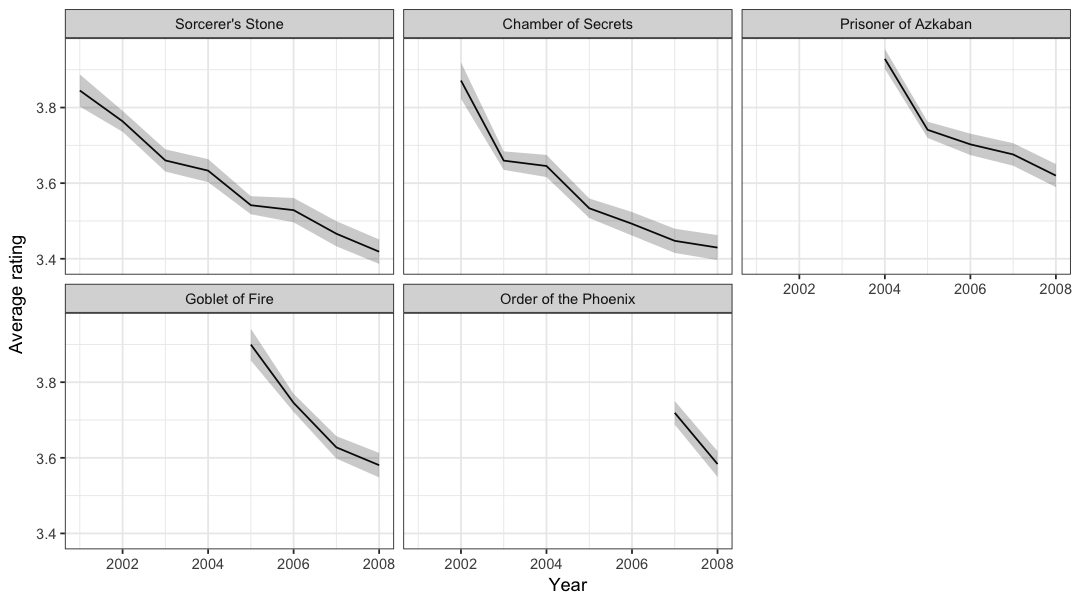

In [63]:
plot_data %>%
    filter(year < 2009) %>%
    ggplot(aes(x = year, y = mean_rating)) +
    geom_line() +
    geom_ribbon(aes(ymin = mean_rating - se_rating, ymax = mean_rating + se_rating), alpha = 0.25) +
    facet_wrap(~ subtitle) +
    scale_x_continuous(breaks = seq(1998, 2008, by = 2)) +
    xlab('Year') +
    ylab('Average rating')

This shows a general pattern that ratings seem to decline after the release year.

This could happen for a lot of reasons.
Possibly because fans see a movie close to its release, and are more likely to like it than casual consumers.
Or because people actually like older things less.
We can't really tell from this data.

# Saving figures

When things are all set we can save our plots to pdfs.

Use long, descriptive filenames and set the width and height accordingly.
It's reasonable to use `width = 4, height = 4` for single panel plots, and scale up from there.

In [64]:
ggsave('harry_potter_series_avg_rating_by_year.pdf', width = 12, height =6)

Then figures are ready to be including in presentations or papers:

  ![Average ratings for the Harry Potter series by year.](harry_potter_series_avg_rating_by_year.pdf)